In [ ]:
!pip uninstall -y numpy

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install --no-cache-dir numpy==1.26.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 332.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.3 which is incompatible.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import numpy
numpy.__version__


'2.0.2'

In [ ]:
!pip install keras
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install tensorflow
!pip install prettytable
!pip install albumentations
!pip install dlib

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
save_path_videos = '/content/drive/MyDrive/paths/dataset_Videos.npy'
save_path_labels = '/content/drive/MyDrive/paths/dataset_labels.npy'

In [3]:
import numpy as np

videos = np.load(save_path_videos)
labels = np.load(save_path_labels)

In [4]:
# Print the shape of the videos and labels arrays
print("Videos shape:", videos.shape)
print("Labels shape:", labels.shape)

Videos shape: (4050, 22, 80, 112, 1)
Labels shape: (4050,)


In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the labels into numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# One-hot encode the labels
labels_onehot = to_categorical(labels_encoded)

# Display the mapping
print("✅ Label encoding mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i} → {label}")

print("✅ Labels encoded and one-hot encoded.")


✅ Label encoding mapping:
0 → a
1 → bye
2 → can
3 → cat
4 → demo
5 → dog
6 → hello
7 → here
8 → is
9 → lips
10 → my
11 → read
12 → you
✅ Labels encoded and one-hot encoded.


In [6]:
label_dict = {0:"a", 1: "bye", 2:"can", 3:"cat", 4:"demo", 5:"dog", 6: "hello", 7:"here", 8:"is", 9:"lips", 10:"my", 11:"read", 12:"you"}

In [7]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    videos, labels_onehot, test_size=0.2, random_state=42, stratify=labels_encoded
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")


Training set: (3240, 22, 80, 112, 1), (3240, 13)
Validation set: (810, 22, 80, 112, 1), (810, 13)


In [8]:
del videos
del labels
del labels_encoded
del labels_onehot

In [9]:
import gc
gc.collect()
!cat /proc/meminfo | grep Mem


MemTotal:       13289424 kB
MemFree:         3269612 kB
MemAvailable:    8337020 kB


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv3D, MaxPooling3D, Flatten, Dense, Dropout)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [11]:
def build_3d_cnn(input_shape, num_classes):
    model = Sequential([
        Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=input_shape),
        MaxPooling3D(pool_size=(1, 2, 2)),
        Dropout(0.25),

        Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
        MaxPooling3D(pool_size=(2, 2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(13, activation='softmax')
    ])
    return model

# Compile and train
model_3d = build_3d_cnn(input_shape=(22,80,112,1), num_classes= 13)
model_3d.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

history = model_3d.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=80,
             batch_size=8,
             callbacks=callbacks)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
405/405 ━━━━━━━━━━━━━━━━━━━━ 45s 91ms/step - accuracy: 0.0950 - loss: 2.8465 - val_accuracy: 0.3617 - val_loss: 2.5450 - learning_rate: 1.0000e-04
Epoch 2/80
405/405 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.1698 - loss: 2.4338 - val_accuracy: 0.3864 - val_loss: 2.1011 - learning_rate: 1.0000e-04
Epoch 3/80
405/405 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.2721 - loss: 2.0740 - val_accuracy: 0.4568 - val_loss: 1.8103 - learning_rate: 1.0000e-04
Epoch 4/80
405/405 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.3484 - loss: 1.8635 - val_accuracy: 0.4593 - val_loss: 1.6879 - learning_rate: 1.0000e-04
Epoch 5/80
405/405 ━━━━━━━━━━━━━━━━━━━━ 35s 86ms/step - accuracy: 0.3803 - loss: 1.7976 - val_accuracy: 0.4543 - val_loss: 1.5926 - learning_rate: 1.0000e-04
Epoch 6/80
405/405 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.3877 - loss: 1.7359 - val_accuracy: 0.4679 - val_loss: 1.5730 - learning_rate: 1.0000e-04
Epoch 7/80
405/405 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/ste

In [12]:
def evaluate_model(model, name="Model"):
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} - Validation Accuracy: {acc:.4f}, Loss: {loss:.4f}")

evaluate_model(model_3d, "3D CNN")



3D CNN - Validation Accuracy: 0.5210, Loss: 1.4151


In [13]:
# Save the trained model
model_3d.save("/content/drive/MyDrive/models/3dcnn.h5")
print("✅ Model saved.")


✅ Model saved.


In [14]:
y_pred_prob = model_3d.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step


In [15]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

# Convert y_pred to one-hot encoded format to match y_val
y_pred_onehot = to_categorical(y_pred, num_classes=y_val.shape[1])

# Generate classification report
report = classification_report(y_val, y_pred_onehot, output_dict=True)

table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label.isdigit():
        precision = round(metrics['precision'], 2)
        recall = round(metrics['recall'], 2)
        f1_score = round(metrics['f1-score'], 2)
        support = metrics['support']
        table.add_row([label_dict[int(label)], precision, recall, f1_score, support])

print(table)

+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   a   |    0.57   |  0.41  |   0.47   |   64.0  |
|  bye  |    0.41   |  0.47  |   0.44   |   62.0  |
|  can  |    0.41   |  0.41  |   0.41   |   61.0  |
|  cat  |    0.62   |  0.54  |   0.58   |   59.0  |
|  demo |    0.64   |  0.47  |   0.54   |   62.0  |
|  dog  |    0.56   |  0.5   |   0.53   |   60.0  |
| hello |    0.69   |  0.47  |   0.56   |   57.0  |
|  here |    0.48   |  0.58  |   0.52   |   66.0  |
|   is  |    0.56   |  0.62  |   0.58   |   65.0  |
|  lips |    0.48   |  0.66  |   0.56   |   64.0  |
|   my  |    0.45   |  0.56  |   0.5    |   64.0  |
|  read |    0.58   |  0.51  |   0.54   |   65.0  |
|  you  |    0.51   |  0.57  |   0.54   |   61.0  |
+-------+-----------+--------+----------+---------+


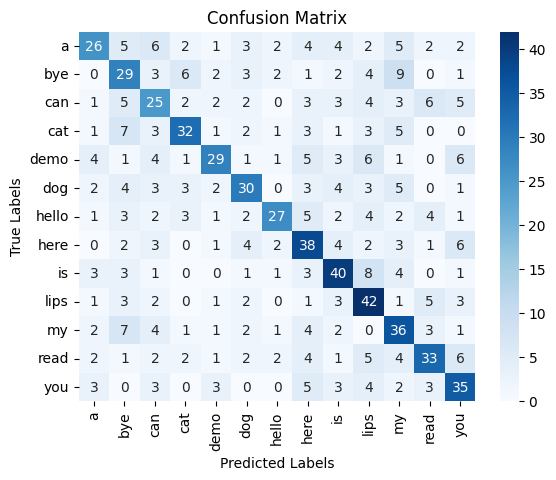

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Convert y_val to multiclass format
y_val_multiclass = np.argmax(y_val, axis=1)  # Convert one-hot to class indices

# Now generate the confusion matrix
conf_matrix = sklearn.metrics.confusion_matrix(y_val_multiclass, y_pred)

# Define the list of label strings in the order of their integer values
label_strings = [label_dict[i] for i in range(len(label_dict))]

# Generate the heatmap confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=label_strings, yticklabels=label_strings)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

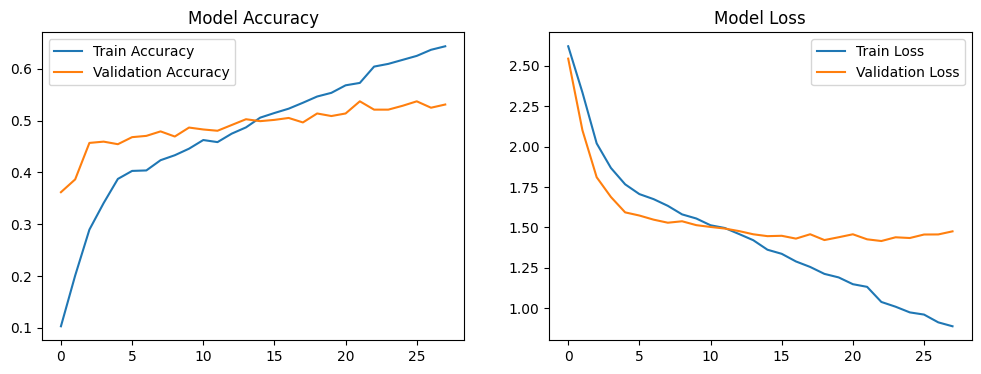

In [17]:
import matplotlib.pyplot as plt
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Model Loss')
    plt.show()

plot_training_history(history)
